# Лабораторная работа №7

## «Классификация с использованием Наивного байесовского классификатора»
## Выполнили студенты Зимин Андрей Валерьевич и Жилин Андрей Игоревич

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import accuracy_score as accuracy, f1_score as f1, confusion_matrix

# Часть 1. Рассмотрите задачу классификации на классическом примере набора «Ирисы» (4 балла). 

### Загрузка датасета

In [2]:
data_x = [(2.6, 1.0), (3.0, 2.3), (3.4, 1.6), (3.0, 1.5), (2.7, 1.0), (3.8, 2.0), (3.0, 1.8), (2.8, 2.1), (2.9, 1.3), (3.0, 1.8), (3.2, 1.5), (2.7, 1.8), (3.0, 1.4), (3.3, 2.5), (2.7, 1.9), (2.6, 1.2), (3.1, 1.4), (2.7, 1.9), (3.1, 2.4), (3.0, 1.5), (2.8, 1.4), (3.1, 1.5), (2.5, 1.8), (2.8, 1.3), (2.8, 1.8), (2.2, 1.5), (3.3, 2.5), (3.2, 1.8), (3.6, 2.5), (3.0, 1.7), (2.3, 1.3), (2.8, 1.3), (2.5, 1.5), (3.0, 2.1), (2.0, 1.0), (2.8, 2.2), (3.0, 1.6), (3.1, 2.1), (3.2, 2.3), (2.5, 1.7), (2.5, 1.1), (3.2, 2.3), (2.8, 1.2), (2.9, 1.5), (2.6, 1.4), (2.2, 1.0), (3.3, 2.1), (2.4, 1.1), (3.4, 2.4), (3.0, 1.2), (2.8, 1.5), (3.2, 1.4), (3.8, 2.2), (2.8, 2.4), (3.0, 1.8), (3.0, 1.5), (3.0, 1.4), (3.0, 2.1), (2.4, 1.0), (3.4, 2.3), (2.7, 1.4), (2.3, 1.0), (2.9, 1.3), (3.3, 1.6), (2.7, 1.3), (2.6, 1.2), (2.4, 1.0), (3.2, 2.0), (3.1, 1.5), (3.0, 1.8), (2.8, 1.9), (2.7, 1.9), (2.8, 1.5), (3.2, 1.8), (3.1, 1.8), (2.5, 1.1), (2.2, 1.5), (2.9, 1.4), (3.0, 2.1), (2.9, 1.3), (2.8, 2.0), (2.5, 2.0), (3.0, 2.2), (3.2, 2.3), (3.1, 2.3), (2.8, 1.3), (2.5, 1.9), (3.0, 2.3), (2.9, 1.3), (2.9, 1.8), (3.0, 2.0), (2.9, 1.8), (2.7, 1.2), (2.5, 1.3), (3.0, 1.3), (2.6, 2.3), (2.8, 2.0), (2.9, 1.3), (2.7, 1.6), (2.3, 1.3)]
data_y = [-1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1]

X = np.array(data_x)
y = np.array(data_y)

### Задание: Выделить обучающую выборку (70% всей выборки, случайное разделение реализовать самостоятельно) и отобразить в виде графика точек на плоскости (объекты разных классов должны быть иметь разные маркеры и цвет, сделавшим в классе +1 балл). 

In [3]:
def train_test_split(X, y, seed, alpha):
  split = None
  if X.shape[0] == y.shape[0]:
    np.random.seed(seed)
    split = np.random.random(size=len(y))

  y_train = y[split <= alpha]
  y_test  = y[split >  alpha]
  X_train = X[split <= alpha]
  X_test  = X[split >  alpha]

  return y_train, y_test, X_train, X_test

y_train, y_test, X_train, X_test = train_test_split(X, y, 10, alpha=0.7)

print("Обучающая выборка:")
print(y_train)
print()
print("Тестовая выборка:")
print(y_test)

Обучающая выборка:
[ 1 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1  1
 -1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1
 -1  1  1 -1  1  1 -1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1 -1 -1  1 -1
 -1 -1]

Тестовая выборка:
[-1 -1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1  1
 -1  1]


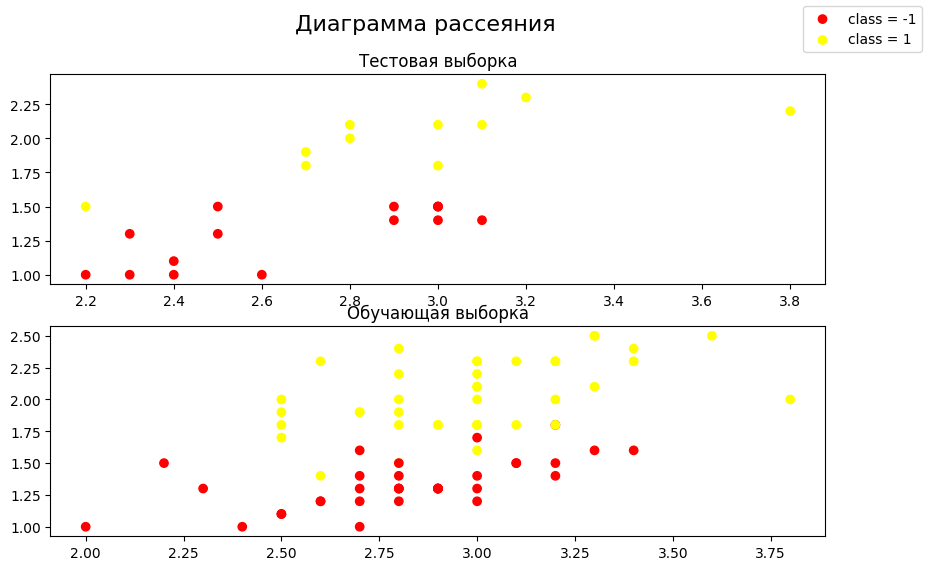

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="autumn")
ax[0].set_title("Тестовая выборка")
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="autumn")
ax[1].set_title("Обучающая выборка")
fig.suptitle('Диаграмма рассеяния', fontsize=16)
fig.legend(["class = -1", "class = 1"])

### Вывод: Классы немного перемешаны, но не сильно: присутствуют 3-4 объекта, которые залезают в скопление другого класса. Скорее всего классификация будет удачная.

### Задание: Обучить модель. Отобразить тестовую выборку, чтобы было понятно качество классификации объектов из неё.

Так как наивный Байесовский классификатор работает с категориальными данными, нам нужно перевести неприрывные признаки в категориальные. Для этого разобъём их на бины. Судя по распределениям, разобъём признаки на 4 и 2 бина.

In [5]:
n = 2
number_bins = [4, 2]
len_bins = [0]*n

for i in range(n): 
    len_bins[i] = (max(X[:, i]) - min(X[:, i])) / number_bins[i]


Теперь закодируем float с помощью булевых масок

In [6]:
new_X = X.copy()

for i in range(n):
    for k in range(number_bins[i]):
        A = X[:, i] >= min(X[:, i])+k*len_bins[i]
        if k == number_bins[i]-1:
            B = X[:, i] <= min(X[:, i])+(k+1)*len_bins[i]
        else:
            B = X[:, i] < min(X[:, i])+(k+1)*len_bins[i]
        AB = np.all([A, B], axis=0)
        new_X = np.insert(new_X, new_X.shape[1], AB, axis=1)
print("Первые 5 значений получившихся признаков после преобразования")
new_X[:5, 2:]

Первые 5 значений получившихся признаков после преобразования


array([[0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.]])

Теперь нужно собрать из one-hot-encoding категории

In [7]:
F1 = np.argmax(new_X[:, [2, 3, 4, 5]], axis=-1)
F2 = np.argmax(new_X[:, [6, 7]], axis=-1) 
new_X = np.column_stack([F1, F2])
print("Категории первых 5 объектов")
new_X[:5, :]

Категории первых 5 объектов


array([[1, 0],
       [2, 1],
       [3, 0],
       [2, 0],
       [1, 0]], dtype=int64)

In [8]:
print("метки классов первых 5 объектов")
y[:5]

метки классов первых 5 объектов


array([-1,  1, -1, -1, -1])

После этого ещё раз разбиваем наши данные

In [9]:
y_train, y_test, X_train, X_test = train_test_split(new_X, y, 10, alpha=0.7)

Посмотрим какие распределения получились

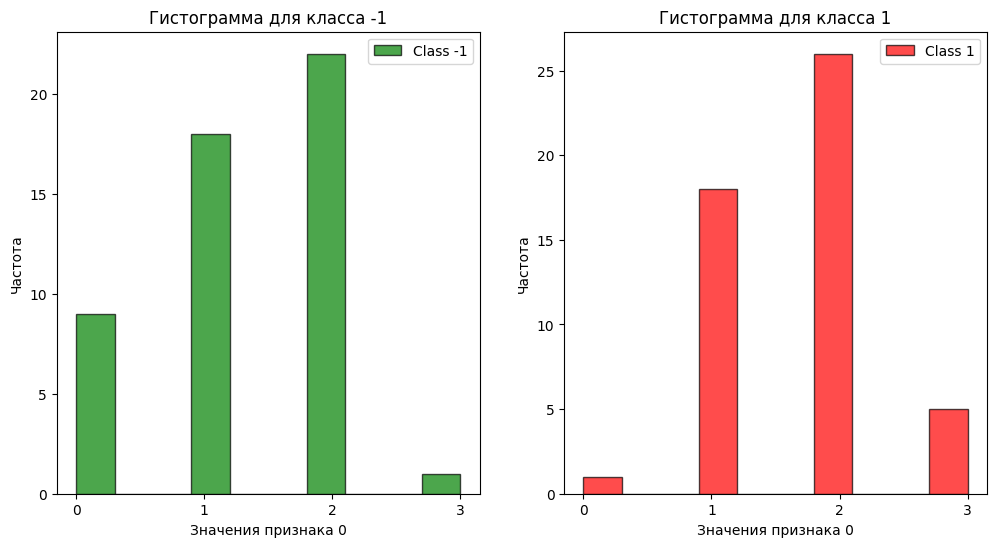

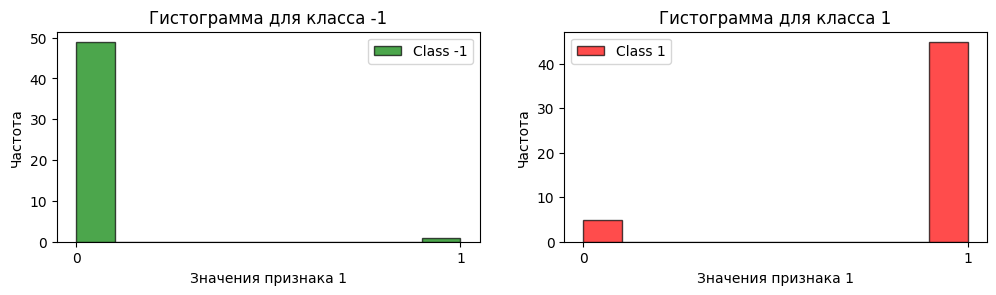

In [10]:
for i in range(n):
    class_neg = new_X[:, i][y == -1]
    class_pos = new_X[:, i][y == 1]

    plt.figure(figsize=(12, 6))

    plt.subplot(i+1, 2, 1)
    plt.hist(class_neg, alpha=0.7, color='green', edgecolor='black', label='Class -1')
    plt.title('Гистограмма для класса -1')
    plt.xlabel(f'Значения признака {i}')
    plt.ylabel('Частота')
    plt.xticks(np.unique(new_X[:, i]))
    plt.legend()

    plt.subplot(i+1, 2, 2)
    plt.hist(class_pos, alpha=0.7, color='red', edgecolor='black', label='Class 1')
    plt.title('Гистограмма для класса 1')
    plt.xlabel(f'Значения признака {i}')
    plt.ylabel('Частота')
    plt.xticks(np.unique(new_X[:, i]))
    plt.legend()

### Вывод: очевидна корреляция меток класса и преобразованного признака 1. Преобразованный признак 0 получился менее информативный.

Формула Байеса имеет вид:
$$P(y_k|X_0,X_1,...,X_n)=\frac{P(y_k) \prod_{i=0}^n{P(X_i|y_k)} }{P(X_0,X_1,...,X_n)}$$

Где:  

$P(y_k|X_i)$ - апостериорная вероятность принадлежности объекта с набором признаков $X_0,X_1,...,X_n$ к классу $y_k$  
$P(y_k)$ - априорная вероятность принадлежности случайно выбранного объекта к классу $y_k$  
$P(X_i|y_k)$ - априорная вероятность того, что случайно выбранный объект класса $y_k$ обладает признаком $X_i$  
$P(X_0,X_1,...,X_n)$ - полная вероятность того, что случайно выбранный объект обладает набором признаков $X_0,X_1,...,X_n$  

Мы взяли из этой формулы главное: числитель $P(y_k) \prod_{i=0}^n{P(X_i|y_k)}$ и определяли степень принадлеждности объекта к классу $k$ по этой формуле. В качестве предсказания выдавали объекту такой класс, где степень приндлежности максимальна (среди всех классов).

In [11]:
class Bayes:
    classes = []
    classes_frequency = []
    number_of_classes = 0
    number_of_features = 0
    features_frequency = []
    total_values = 0

    def fit(self, X, y):
        # построение иерархической структуры частот
        self.classes, self.classes_frequency = np.unique(y, return_counts=True)
        self.number_of_classes = len(self.classes)
        self.total_values = X.shape[0]
        self.number_of_features = X.shape[1]
        self.features_frequency = [0]*self.number_of_features
        for feature in range(self.number_of_features):
            values, values_frequency = np.unique(X[:, feature], return_counts=True)
            values_frequency_in_classes = [0]*self.number_of_classes
            for c in range(self.number_of_classes):
                v, f = np.unique(X[y == self.classes[c], feature], return_counts=True)
                f = np.array(list(f) + [0]*(len(values) - len(v))) 
                values_frequency_in_classes[c] = f
            self.features_frequency[feature] = {"values":values, 
                                                "values_frequency":values_frequency, 
                                                "values_frequency_in_classes": values_frequency_in_classes}
    def P_y(self, k):
        # априорная вероятность принадлежности случайно выбранного объекта к классу y_k
        return self.classes_frequency[k] / self.total_values
    
    def P_Xy(self, i, k, value):
        # априорная вероятность того, что у случайно выбранного объекта класса y_k значение признака i == value
        find_value = np.where(self.features_frequency[i]["values"] == value)
        if len(find_value[0]) > 0:
            # если такое значение признака встречалось в обучающей выборке
            index_of_value = np.where(self.features_frequency[i]["values"] == value)[0][0]
            return self.features_frequency[i]["values_frequency_in_classes"][k][index_of_value] / self.classes_frequency[k]
        else:
            # если значения не было, то априорная мероятность его появления равна нулю
            return 0

    def Composition_P_Xy(self, k, object):
        # произведение P_Xy по каждому признаку данного объекта
        composition = 1
        for i in range(self.number_of_features):
            composition *= self.P_Xy(i, k, object[i])
        return composition
    
    def P_full(self, object):
        # полная вероятность того, что случайно выбранный объект обладает набором признаков object[0], object[1], ..., object[n]
        composition = 1
        for i in range(self.number_of_features):
            index_of_value = np.where(self.features_frequency[i]["values"] == object[i])[0][0]
            composition *= self.features_frequency[i]["values_frequency"][index_of_value] / self.total_values
        return composition
    
    def P_yX(self, k, object):
        # апостериорная вероятность принадлежности объекта с набором признаков 
        # object[0], object[1], ..., object[n] к классу y_k 
        # но без знаменателя этой дроби
        result = self.P_y(k) * self.Composition_P_Xy(k, object) 
        return result
    
    def predict_one_object(self, object):
        # функция предсказания на одном объекте
        max_P = 0
        best_k = 0
        P = [0.0]*self.number_of_classes
        for k in range(self.number_of_classes):
            P[k] = self.P_yX(k, object)
            if P[k] > max_P:
                max_P = P[k]
                best_k = k
        return self.classes[best_k] 
    
    def predict(self, X):
        return np.array([self.predict_one_object(i) for i in X])
        

model = Bayes()
model.fit(X_train, y_train)
print("Предсказанные метки классов для обучающей выборки")
predict_y_train = model.predict(X_train)
predict_y_train

Предсказанные метки классов для обучающей выборки


array([ 1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1, -1, -1, -1])

In [12]:
print("Предсказанные метки классов для тестовой выборки")
predict_y_test = model.predict(X_test)
predict_y_test

Предсказанные метки классов для тестовой выборки


array([-1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1, -1,  1])

### Вывод: модель работает, осталось оценить качество классификации

### Посчитаем метрики

In [13]:
def print_metrics(y_train, y_test, predict_y_train, predict_y_test, pos_label=1):
    print("Обучающая выборка:")
    print(f"    accuracy: {accuracy(y_train, predict_y_train):.02f}")
    print(f"    f1:       {f1(y_train, predict_y_train, pos_label=pos_label):.02f}")
    print()
    print("Тестовая выборка:")
    print(f"    accuracy: {accuracy(y_test, predict_y_test):.02f}")
    print(f"    f1:       {f1(y_test, predict_y_test, pos_label=pos_label):.02f}")
    
print_metrics(y_train, y_test, predict_y_train, predict_y_test)

Обучающая выборка:
    accuracy: 0.88
    f1:       0.87

Тестовая выборка:
    accuracy: 0.92
    f1:       0.90


Text(627.9949494949494, 0.5, 'Действительный класс')

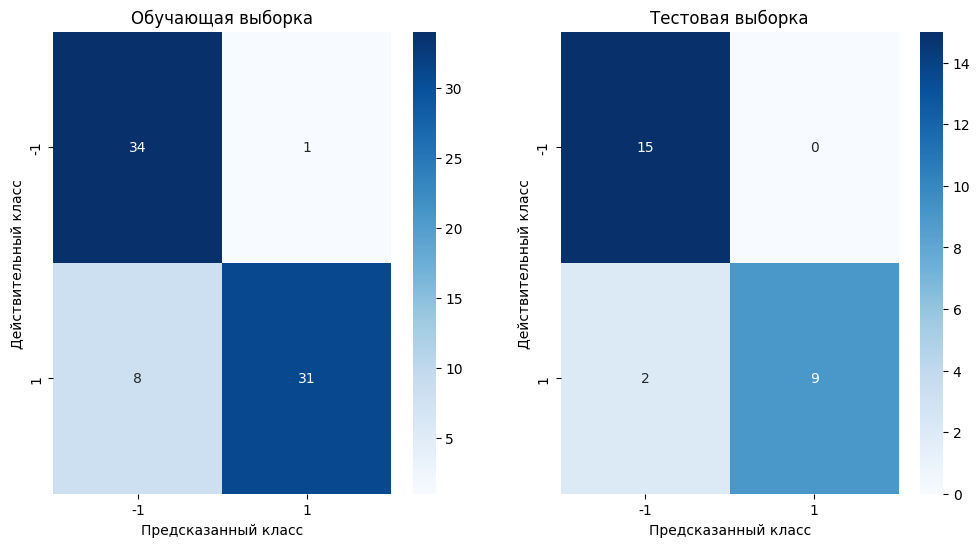

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_train, predict_y_train), annot=True, cmap='Blues', fmt='g', xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.title('Обучающая выборка')
plt.xlabel('Предсказанный класс')
plt.ylabel('Действительный класс')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, predict_y_test), annot=True, cmap='Blues', fmt='g', xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.title('Тестовая выборка')
plt.xlabel('Предсказанный класс')
plt.ylabel('Действительный класс')

### Вывод: Получилась неплохая модель, которая достаточно адекватно предказывает класс. Есть ошибки, но они зависят от исходного разбиения

### Задание: Выполнить кросс-валидацию (реализовать самостоятельно). Оценить качество модели.

In [15]:
def cross_validation(model_class, X, y, size, seed=10):
    # склеиваем X и y
    concat = np.insert(X, 0, y, axis=1)
    np.random.seed(seed)

    # теперь у нас случайно перемешаные X и y
    permutation_concat = np.random.permutation(concat)
    permutation_y = permutation_concat[:, 0]
    permutation_X = permutation_concat[:, 1:]
    
    n = permutation_X.shape[0]//size
    train_acc = np.array([0.0]*n)
    valid_acc = np.array([0.0]*n)
    train_f1 = np.array([0.0]*n)
    valid_f1 = np.array([0.0]*n)

    for i in range(n):
        X_valid = permutation_X[(i*size):((i+1)*size), :]
        y_valid = permutation_y[(i*size):((i+1)*size)]

        X_train = np.concatenate([permutation_X[:(i*size), :], permutation_X[((i+1)*size):, :]]) 
        y_train = np.concatenate([permutation_y[:(i*size)],    permutation_y[((i+1)*size):]]) 
        
        model = model_class()
        model.fit(X_train, y_train)
        train_acc[i] = accuracy(y_train, model.predict(X_train))
        valid_acc[i] = accuracy(y_valid, model.predict(X_valid))
        train_f1[i] = f1(y_train, model.predict(X_train))
        valid_f1[i] = f1(y_valid, model.predict(X_valid))

    print("Метрики на кросс-валидации")
    print(f"Среднее значение accuracy на обучающей выборке:     {train_acc.mean():.03f}")
    print(f"Среднее значение accuracy на валидационной выборке: {valid_acc.mean():.03f}")
    print()    
    print(f"Среднее значение F1 на обучающей выборке:     {train_f1.mean():.03f}")
    print(f"Среднее значение F1 на валидационной выборке: {valid_f1.mean():.03f}")   

cross_validation(Bayes, new_X, y, 10, 10)

Метрики на кросс-валидации
Среднее значение accuracy на обучающей выборке:     0.934
Среднее значение accuracy на валидационной выборке: 0.930

Среднее значение F1 на обучающей выборке:     0.931
Среднее значение F1 на валидационной выборке: 0.929


### Судя по метрикам можно сказать, что модель хорошая. 

# Часть 2. Самостоятельно реализовать наивный байес для задачи обнаружения спама (на основе данных из файла «SpamDetectionData.txt», 6 баллов).

В качестве метрики для сравнения использовать точность (accuracy) – процент правильно классифицированных примеров из тестовой выборки. Сравнить точность на train/ test частях.

### 2.1.	Загрузить обучающую выборку в 2 списка – позитивные и негативные отзывы. Чему равна минимальная, максимальная, средняя, медианная длина (в символах) позитивных / негативных отзывов? Показать диаграмму долей разных классов отзывов в наборе.

Загрузку и предобработку удобно делать сразу и вместе. Поэтому ниже сразу два задания

### 2.2 Сделать предобработку. Перевести отзывы в нижний регистр. Подумать, как быть со знаками препинания, цифрами, иными символами.

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("data/SpamDetectionData.txt", sep=",")
df["text"] = df["text"].apply(
    lambda x: re.sub(
        r'[^\w\s]', '', re.sub(r'<.*?>', ' ', str(x))
        ).replace('  ', ' ').replace('  ', ' ').lower().split()) 
df.head()

,target,text
0,Spam,"[but, could, then, once, pomp, to, nor, that, ..."
1,Spam,"[his, honeyed, and, land, vile, are, so, and, ..."
2,Spam,"[tear, womans, his, was, by, had, tis, her, er..."
3,Spam,"[the, that, and, land, cell, shun, blazon, pas..."
4,Spam,"[sing, aught, through, partings, things, was, ..."


Загрузили в dataframe. Убрали знаки препинания, перевели в нижний регистр. Далее в два списка. Цифр в выборке нет.

In [18]:
spam_words = [word for sublist in df[df["target"] == "Spam"]['text'] for word in sublist]
ham_words = [word for sublist in df[df["target"] == "Ham"]['text'] for word in sublist]
all_words = list(set(spam_words + ham_words))

spam_lengths = np.array([len(word) for word in spam_words])
ham_lengths = np.array([len(word) for word in ham_words])

In [19]:
print("Спам")
print(f"Слово с максимальной длинной: {max(spam_words, key=len)} ({len(max(spam_words, key=len))} символов)")
print(f"Слово с минимальной  длинной: {min(spam_words, key=len)} ({len(min(spam_words, key=len))} символ)")
print(f"Средняя длинна: {np.mean(spam_lengths):.00f} символа")
print(f"Медиальная длинна: {np.median(spam_lengths):.00f} символа")
print()
print("Не спам")
print(f"Слово с максимальной длинной: {max(ham_words, key=len)} ({len(max(ham_words, key=len))} символов)")
print(f"Слово с минимальной  длинной: {min(ham_words, key=len)} ({len(min(ham_words, key=len))} символ)")
print(f"Средняя длинна: {np.mean(ham_lengths):.00f} символа")
print(f"Медиальная длинна: {np.median(ham_lengths):.00f} символа")




Спам
Слово с максимальной длинной: disappointed (12 символов)
Слово с минимальной  длинной: a (1 символ)
Средняя длинна: 4 символа
Медиальная длинна: 4 символа

Не спам
Слово с максимальной длинной: nevernevermore (14 символов)
Слово с минимальной  длинной: i (1 символ)
Средняя длинна: 5 символа
Медиальная длинна: 4 символа


### Вывод: тексы сообщений в целом сбалансированы.

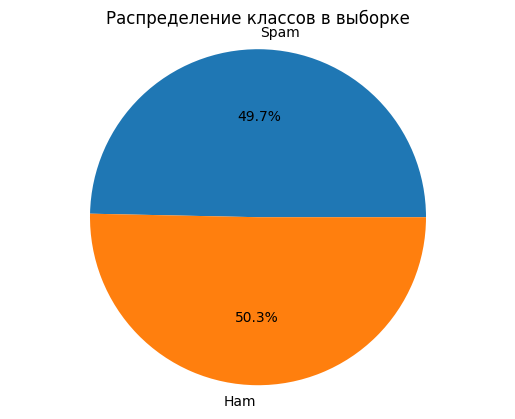

In [20]:
vals = [df[df["target"] == "Spam"].shape[0], df[df["target"] == "Ham"].shape[0]]
labels = ["Spam", "Ham"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis("equal")
ax.set_title("Распределение классов в выборке")
print()

### Вывод: классы в выборке сбалансированы. Можно использовать accuracy в качестве основной метрики. 

### 2.3. Сделать токенизацию – то есть представить каждый отзыв в виде списка токенов 

In [21]:
df

,target,text
0,Spam,"[but, could, then, once, pomp, to, nor, that, ..."
1,Spam,"[his, honeyed, and, land, vile, are, so, and, ..."
2,Spam,"[tear, womans, his, was, by, had, tis, her, er..."
3,Spam,"[the, that, and, land, cell, shun, blazon, pas..."
4,Spam,"[sing, aught, through, partings, things, was, ..."
...,...,...
2095,Ham,"[distant, pondered, me, sought, so, there, per..."
2096,Spam,"[relief, flee, not, and, oh, will, shamed, min..."
2097,Ham,"[gloated, just, the, shrieked, lost, morrow, i..."
2098,Spam,"[aye, girls, had, plain, the, deem, to, a, at,..."


dataframe у нас сейчас в таком виде. Нужно сделать токенизацию. Для этого для каждого предложения посчитаем какие слова в нём встречались и какие слова не встречались. Каждое слово будет признаком. А количество втречаемости - значение категории. 

In [22]:
df_exploded = df.explode('text')
one_hot_df = pd.get_dummies(df_exploded['text'])
tokens = one_hot_df.groupby(one_hot_df.index).sum()
tokens

,a,above,adieu,adore,adversity,again,agen,agreeing,ah,aidenn,...,wrought,ye,yea,yes,yet,yore,you,youhere,your,youth
0,3,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,2,0,1,0,1,0,0,0,3,0,...,0,0,1,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,3,0,...,0,0,0,0,1,0,0,0,0,0
3,4,0,2,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
4,2,0,0,0,1,0,0,0,1,0,...,0,0,0,1,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,4,1,0,0,0,0,0,1,1,1,...,2,0,0,0,0,2,0,0,0,0
2096,7,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2097,5,2,0,1,0,1,0,0,0,2,...,1,0,0,0,0,0,1,0,0,0
2098,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Можно посмотреть на что это похоже. Далее переводим в numpy массив

In [23]:
X = tokens.to_numpy()
X

array([[3, 0, 0, ..., 0, 0, 1],
       [2, 0, 1, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 2, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [2, 5, 0, ..., 0, 1, 0]], dtype=int64)

In [24]:
y = df["target"].to_numpy()
y.astype(str)

array(['Spam', 'Spam', 'Spam', ..., 'Ham', 'Spam', 'Ham'], dtype='<U4')

### 2.4 Построить 2 словаря {слово:частота} с частотами каждого слов в позитивных и негативных отзывах.

In [25]:
all_words_frequency = tokens.sum()
spam_words_frequency = tokens[y == "Spam"].sum()
ham_words_frequency = tokens[y == "Ham"].sum()

spam_words_probability = spam_words_frequency / spam_words_frequency.sum()
ham_words_probability = ham_words_frequency / ham_words_frequency.sum()
words_log_weight = np.log(ham_words_probability / spam_words_probability).sort_values(ascending=False)

stats = pd.concat([words_log_weight, spam_words_frequency, ham_words_frequency], axis=1)
stats.columns = ["Байесовский вес", "Частота в спаме", "Частота в не спаме"]
stats[:20]

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Байесовский вес,Частота в спаме,Частота в не спаме
madam,inf,0,316
reply,inf,0,322
rare,inf,0,673
raven,inf,0,3546
reclining,inf,0,360
fowl,inf,0,742
relevancy,inf,0,364
remember,inf,0,349
repeating,inf,0,366
form,inf,0,367


In [26]:
stats[-20:]

,Байесовский вес,Частота в спаме,Частота в не спаме
reverie,-inf,381,0
sadness,-inf,379,0
fly,-inf,325,0
sacred,-inf,361,0
fondly,-inf,345,0
run,-inf,365,0
riot,-inf,357,0
rill,-inf,361,0
rhyme,-inf,324,0
revellers,-inf,323,0


Очевидно, что бесконечным положительным весом обладают слова, которых не встречаются в спаме. Бесконечным отрицательным весом обладают слова, которые встречаются только в спаме.

### 2.5	Используя формулы из теории реализовать байесовские классификаторы

Классификатор был реализован выше. В качестве тестовой выборки берём последние 100 предложений (2100 предложений всего). 

In [27]:
y_train, y_test, X_train, X_test = y[:2000], y[2000:], X[:2000, :], X[2000:, :]

model = Bayes()
model.fit(X_train, y_train)
print("Предсказанные метки классов для обучающей выборки (первые 10 значений)")
predict_y_train = model.predict(X_train)
predict_y_train[:10]

Предсказанные метки классов для обучающей выборки (первые 10 значений)


array(['Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam',
       'Spam', 'Spam'], dtype='<U4')

In [28]:
print("Предсказанные метки классов для тестовой выборки (первые 10 значений)")
predict_y_test = model.predict(X_test)
predict_y_test[:10]

Предсказанные метки классов для тестовой выборки (первые 10 значений)


array(['Ham', 'Ham', 'Ham', 'Ham', 'Spam', 'Ham', 'Ham', 'Ham', 'Spam',
       'Spam'], dtype='<U4')

Посчитаем метрики

In [29]:
print_metrics(y_train, y_test, predict_y_train, predict_y_test, pos_label="Spam")

Обучающая выборка:
    accuracy: 1.00
    f1:       1.00

Тестовая выборка:
    accuracy: 0.82
    f1:       0.74


Text(627.9949494949494, 0.5, 'Действительный класс')

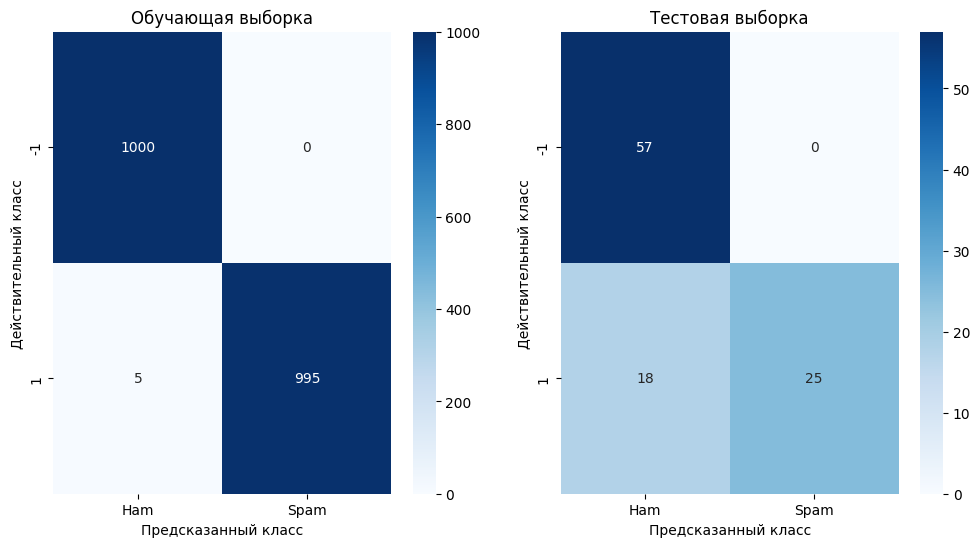

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_train, predict_y_train), annot=True, cmap='Blues', fmt='g', xticklabels=["Ham", "Spam"], yticklabels=[-1, 1])
plt.title('Обучающая выборка')
plt.xlabel('Предсказанный класс')
plt.ylabel('Действительный класс')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, predict_y_test), annot=True, cmap='Blues', fmt='g', xticklabels=["Ham", "Spam"], yticklabels=[-1, 1])
plt.title('Тестовая выборка')
plt.xlabel('Предсказанный класс')
plt.ylabel('Действительный класс')

### Вывод: вполне неплохая модель получилась, но есть куда расти. Возможно, другая реализация наивного Байесовского классификатора и (или) другой способ предобработки справится лучше. 

Из других вариантов: 
1. Можно было бы использовать посчитанные Байесовские веса, а не частоты. Но наша реализация работает с частотами.
2. Можно было бы применить TF-IDF для представления слов. Или что-то более интересное. Но это не входит в рамки данной лабораторной работы.